In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inventory optimization
In the inventory model, ${X_{n},n\ge 0}$ is defined as a product's inventroy level at the end of the n-th day and $X_0$ is the initial inventory level of that product. The demand of the product during the n-th day is defined as ${D_{n},n\ge 1}$. To minimize the costs of the inventory for an $s_{min}$ and $s_{max}$ that satisfy $0\leq s_{min}\leq s_{max}$, if the inventory is less o iqual to $s_{min}$, then the product's order is made such that the product's inventory level reach $s_{max}$. Taking into account this, for $n\ge 0$:
$$
X_{n+1}= 
     \begin{cases}
       max\{X_n -D_{n+1},0\} &\quad\text{if } s_{min}<X_n\le s_{max}\\ 
       max\{s_{max}-D_{n+1},0\} &\quad\text{if } X_n\le s_{min}\\ 
     \end{cases}
$$
The unsatisfied demand on the n-th day is defined as ${U_{n},n\ge 1}$:
$$
U_{n}= 
     \begin{cases}
       max\{D_n -X_{n-1},0\} &\quad\text{if } s_{min}<X_{n-1}\le s_{max}\\ 
       max\{D_{n}-s_{max},0\} &\quad\text{if } X_{n-1}\le s_{min}\\ 
     \end{cases}
$$

In [2]:
s_min = 3
s_max = 8

N = 500

In [3]:
def iterar():
    x = [0]
    xprom = []
    for i in range(N):
        # demanda en el n-esimo dia
        d_n = np.random.binomial(10, 0.4)
        if(x[-1] > s_min & x[-1] <= s_max):
            x.append(max(0, x[-1]-d_n))
        else:
            x.append(max(0, s_max-d_n))

    for i in range(N):
        sum = 0
        for j in range(i):
            sum += x[j]
        xprom.append((sum+0.0)/(i+1))

    plt.plot(xprom)

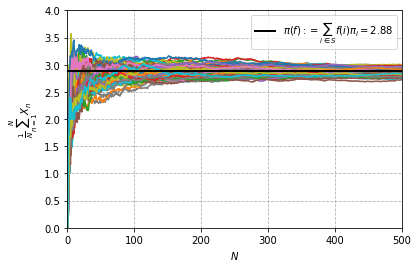

In [7]:
for i in range(100):
    iterar()
plt.grid(True,linestyle='--')
plt.xlabel(r"$N$")
plt.ylabel(r"$\frac{1}{N} \sum^N_{n=1} X_n $")
# plt.title(r"$Punto\ 9$")
ys = np.zeros(500) + 2.8830663307574635
plt.plot(ys,lw = 2,c = "black",label = r"$\pi (f) := \sum_{i\in S}f(i)\pi_i = 2.88$")
plt.xlim(0,500)
plt.ylim(0,4)
plt.legend()